In [1]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
from PIL import Image
from random import shuffle,seed
from pprint import pprint

In [2]:
batch_size = 22
image_size = (56,56)

src_dir = '/home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/'
dest_dir = '/home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_batches/'

In [3]:
files = []
for fx in os.listdir(src_dir):
    files.append(os.path.join(src_dir,fx))
pprint(files[:3])
seed(0)
shuffle(files)
pprint(files[:3])        

['/home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/31624.jpg',
 '/home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/1795.jpg',
 '/home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/1957.jpg']
['/home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/29512.jpg',
 '/home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/101209.jpg',
 '/home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/10576.jpg']


In [4]:
shuffle(files)
pprint(files[:3])

['/home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/26351.jpg',
 '/home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/21293.jpg',
 '/home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/383.jpg']


In [5]:
def load_image(fx):
    im = Image.open(fx)
    im = im.resize(image_size)
    im = np.array(im)
    im = im/255.0
    print im.shape,':',fx
    im = np.reshape(im,(1,image_size[0],image_size[1],3))
    return im

In [6]:
df = pd.read_csv('/home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_labels/final_train_labels.csv')
df = df.drop('Unnamed: 0',axis=1)
df

,filename,artist,title
0,37256.jpg,Claude Monet,Gardener's House at Antibes
1,3016.jpg,Pierre-Auguste Renoir,Ambroise Vollard Portrait
2,28824.jpg,Claude Monet,Haystacks
3,16139.jpg,Claude Monet,Vetheuil
4,11233.jpg,Claude Monet,Rouen Cathedral
5,15562.jpg,Claude Monet,"Rouen Cathedral, evening, harmony in brown"
6,37160.jpg,Claude Monet,"Weeping Willow, Giverny"
7,25299.jpg,Camille Pissarro,The Hermitage at Pontoise
8,3603.jpg,Pierre-Auguste Renoir,By the Water (Near the Lake)
9,38252.jpg,Claude Monet,Trees in Bloom


In [7]:
artist_names = np.unique(df['artist'])
print artist_names
artist_names = artist_names.tolist()
print artist_names.index('Claude Monet')

['Boris Kustodiev' 'Camille Pissarro' 'Claude Monet' 'Ilya Repin'
 'Jean-Baptiste-Camille Corot' 'Martiros Saryan' 'Paul Gauguin'
 'Pierre-Auguste Renoir' 'Pyotr Konchalovsky']
2


In [8]:
o_h_base = np.zeros(len(artist_names))
print o_h_base.shape

(9,)


In [9]:
a = df.loc[df['filename']=='37472.jpg','artist']
print a.iloc[0]

Pierre-Auguste Renoir


In [10]:
def load_labels(fx):
    a = os.path.basename(fx)
    #print df.loc[df['filename']==a,'artist']
    name = df.loc[df['filename'] == a,'artist'].iloc[0]
    #print name                                                    #iloc was added so that i get only artist name and not the whole series
    o_h_base = np.zeros(len(artist_names))
    b = artist_names.index(name)
    o_h_base[b]+=1
    o_h_base = o_h_base.reshape([1,9])
    return o_h_base

In [11]:
def create_batch(batch_number):
    shuffle(files)
    batch = files[batch_number*batch_size:(batch_number+1)*batch_size]
    images = np.concatenate([load_image(f) for f in batch],axis=0)
    labels = np.concatenate([load_labels(f) for f in batch],axis=0)
    save_path = os.path.join(dest_dir,'Batch-{}.npz'.format(batch_number))
    np.savez(save_path,images=images,labels=labels)
    

In [12]:
no_of_files = len(files)
print no_of_files

no_of_batches = no_of_files/batch_size
print no_of_batches

1337
60


In [13]:
for ix in range(no_of_batches):
    print 'batch:',ix
    print '----------------------'
    create_batch(ix)
    print '----------------------'

batch: 0
----------------------
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/38210.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/14448.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/13540.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/21439.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/16344.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/21080.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/38211.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/101452.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/21042.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/2831.jpg
(56, 56,

(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/36972.jpg
----------------------
batch: 4
----------------------
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/32867.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/31305.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/2589.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/32164.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/34509.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/21802.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/22486.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/28824.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_d

----------------------
batch: 8
----------------------
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/36599.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/35537.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/11374.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/26820.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/38211.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/29946.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/31990.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/302.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/29103.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_da

(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/21080.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/31560.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/13241.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/10923.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/20442.jpg
----------------------
batch: 12
----------------------
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/20507.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/20780.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/24678.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/302.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_d

(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/36697.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/101449.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/14211.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/16394.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/1483.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/33429.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/27370.jpg
----------------------
batch: 16
----------------------
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/25114.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/3954.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_

(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/19501.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/101290.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/16608.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/36301.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/33846.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/27836.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/29046.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/16541.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/29205.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/22876.jpg
----------------------
batch: 20
------

(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/26189.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/19555.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/10635.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/17071.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/17872.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/15099.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/23584.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/24910.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/23722.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/101901.jpg
(56, 56, 3) : /home/shashank/Desktop/Pr

(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/39796.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/38970.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/100651.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/34509.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/29105.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/12994.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/10935.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/10607.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/384.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/17490.jpg
----------------------
batch: 28
--------

(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/25627.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/31850.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/12699.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/11374.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/38600.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/37907.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/21221.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/2104.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/3664.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/10503.jpg
(56, 56, 3) : /home/shashank/Desktop/Proje

(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/33419.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/12422.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/37832.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/26061.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/25975.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/11055.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/37518.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/24688.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/26351.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/32.jpg
(56, 56, 3) : /home/shashank/Desktop/Projec

(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/100132.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/16344.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/22889.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/102100.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/1475.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/33496.jpg
----------------------
batch: 40
----------------------
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/23450.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/11471.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/31561.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_trai

(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/15562.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/22982.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/2699.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/12699.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/13999.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/33496.jpg
----------------------
batch: 44
----------------------
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/37256.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/27740.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/102929.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train

(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/39216.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/102751.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/16166.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/39980.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/100222.jpg
----------------------
batch: 48
----------------------
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/35887.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/24138.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/36836.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/39173.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_tra

----------------------
batch: 52
----------------------
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/11054.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/28600.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/33171.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/100647.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/29049.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/23699.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/21125.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/10292.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/10329.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_trai

(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/39040.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/1795.jpg
----------------------
batch: 56
----------------------
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/22104.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/25848.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/2607.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/18292.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/26005.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/11791.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/33498.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_d

(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/10044.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/102181.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/26500.jpg
(56, 56, 3) : /home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/10582.jpg
----------------------


In [14]:
batch_path = os.path.join(dest_dir,"Batch-{}.npz")
train_batch_start_idx = 0
train_batch_end_idx = 49
val_batch_start_idx = 50
val_batch_end_idx = 54
test_batch_start_idx = 55
test_batch_end_idx = 59

In [15]:
def Weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(initial)

In [16]:
def Bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [17]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

In [18]:
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [19]:
x_pl = tf.placeholder(tf.float32,shape=[None,56,56,3])
y_pl = tf.placeholder(tf.float32,shape=[None,9])

In [20]:
W_conv1 = Weight_variable([5,5,3,32])
B_conv1 = Bias_variable([32])

In [21]:
h_conv1 = tf.nn.relu(conv2d(x_pl,W_conv1)+B_conv1)
h_pool1 = max_pool_2x2(h_conv1)
print h_pool1.shape

(?, 28, 28, 32)


In [22]:
W_conv2 = Weight_variable([5, 5, 32, 64])
B_conv2 = Bias_variable([64])

In [23]:
h_conv2 = tf.nn.relu(conv2d(h_pool1,W_conv2)+B_conv2)
h_pool2 = max_pool_2x2(h_conv2)
print h_pool2.shape

(?, 14, 14, 64)


In [24]:
# W_conv3 = Weight_variable([5, 5, 64, 128])
# B_conv3 = Bias_variable([128])

In [25]:
# h_conv3 = tf.nn.relu(conv2d(h_pool2,W_conv3)+B_conv3)
# h_pool3 = max_pool_2x2(h_conv3)
# print h_pool3.shape

In [26]:
W_fc1 = Weight_variable([14 * 14 * 64, 128])
B_fc1 = Bias_variable([128])

h_pool2_flat = tf.reshape(h_pool2, [-1, 14*14*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + B_fc1)
print h_fc1.shape

(?, 128)


In [27]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [28]:
W_fc2 = Weight_variable([128, 9])
B_fc2 = Bias_variable([9])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + B_fc2
print y_conv.shape

(?, 9)


In [29]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_pl, logits=y_conv))

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [30]:
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_pl, 1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [31]:
train_hist = []
val_hist = []
test_hist = []

In [32]:
max_epochs = 20
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for ex in range(max_epochs):
        print 'epoch number:',ex
        print'-------------------------------------------'
        for train_idx in range(train_batch_start_idx, train_batch_end_idx):
            train = np.load(batch_path.format(train_idx))
            train_step.run(feed_dict={x_pl: train["images"], y_pl : train["labels"], keep_prob : 0.5})
            
        train_accuracy = 0.0
        for train_idx in range(train_batch_start_idx, train_batch_end_idx):
            train = np.load(batch_path.format(train_idx))
            train_accuracy += accuracy.eval(feed_dict={x_pl: train["images"],y_pl:train["labels"],keep_prob : 1.0  })
        train_accuracy /= (train_batch_end_idx - train_batch_start_idx)
        train_hist.append(train_accuracy)
        print 'train accuracy is :',train_accuracy*100,'%'
        
        val_accuracy = 0.0
        for val_idx in range(val_batch_start_idx, val_batch_end_idx):
            val = np.load(batch_path.format(val_idx))
            val_accuracy += accuracy.eval(feed_dict={x_pl: val["images"],y_pl:val["labels"],keep_prob : 1.0  })
        val_accuracy /= (val_batch_end_idx - val_batch_start_idx)
        val_hist.append(val_accuracy)
        print 'validation accuracy is :',val_accuracy*100,'%'
        
        
        test_accuracy = 0.0
        for test_idx in range(test_batch_start_idx, test_batch_end_idx):
            test = np.load(batch_path.format(test_idx))
            test_accuracy += accuracy.eval(feed_dict={x_pl: test["images"],y_pl:test["labels"],keep_prob: 1.0  })
        test_accuracy /= (test_batch_end_idx - test_batch_start_idx)
        test_hist.append(test_accuracy)
        print 'testing accuracy',test_accuracy*100,'%'
        print'--------------------------------------------'

epoch number: 0
-------------------------------------------
train accuracy is : 16.1410021843 %
validation accuracy is : 13.6363640428 %
testing accuracy 20.4545460641 %
--------------------------------------------
epoch number: 1
-------------------------------------------
train accuracy is : 22.6345088713 %
validation accuracy is : 25.0000003725 %
testing accuracy 27.2727280855 %
--------------------------------------------
epoch number: 2
-------------------------------------------
train accuracy is : 25.8812620628 %
validation accuracy is : 19.3181820214 %
testing accuracy 20.4545460641 %
--------------------------------------------
epoch number: 3
-------------------------------------------
train accuracy is : 28.5714289972 %
validation accuracy is : 27.272727713 %
testing accuracy 22.7272730321 %
--------------------------------------------
epoch number: 4
-------------------------------------------
train accuracy is : 30.1484233263 %
validation accuracy is : 30.6818187237 %
test

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.show>

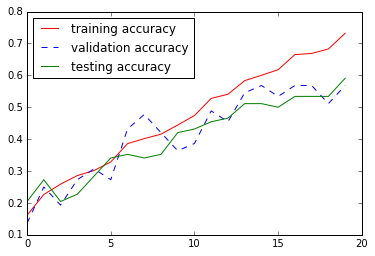

In [39]:
plt.figure(0)
plt.plot(train_hist,'r-',label='training accuracy')
plt.plot(val_hist,'b--',label='validation accuracy')
plt.plot(test_hist,'g-',label='testing accuracy')
plt.legend(loc='best')
plt.show
